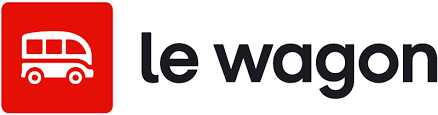

# Predicting house prices

In this challenge, you'll be using your newly acquired Linear Regression skills to try **to predict house prices in Ames, Iowa!**

You'll have to do some more complex preprocessing and when you try to model, things might not go your way...

**Let's get started!**

## Import the Data

Start by importing the data from this link!

[`Iowa_housing_prices.csv`](https://drive.google.com/file/d/1YgFv1_0-xl0blchMvhtUev4vzYX0BFGs/view?usp=sharing)

Load it into a dataframe!

In [ ]:
import pandas as pd
df = pd.read_csv('Iowa_housing_prices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Cleaning

### Handle NA values

Unlike the previous challenge, this dataset **has not been cleaned**!

Most important thing to take care of are NA values!

Which columns have missing values?

### To drop or to fill?

Some columns miss many more values than others!


Typically we woudl drop columns that have more than 30% missing values. For the others, usually we would fill them using an imputer, but for now to keep things simple let's drop all our missing values.

In [ ]:
# create a pd.Series with the sum of null values
df_null = df.isna().sum()

# Get only the columns with 30% missing values
columns_to_drop = df_null[df_null/len(df) > .3].index

# drop the columns
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# drop all
df = df.dropna()

## Picking X and y

After cleaning, we are left with 76 columns/features. That's a lot to choose from! If we were experts in real estate, we could use our domain knowledge and pick out features we know are important!

However, we're not taking that approach today. We'll use all of the features to try to reach a prediction, all 76 of them!

Assign `X` and `y` appropriately! Keep in mind that we are trying to predict house prices!

In [ ]:
X = df.drop(columns='SalePrice').copy()
y = df['SalePrice']

### Train test split
As always, we need to split the data into train and test!

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=30)

## Normalization

We can't skip this step! However, unlike the previous challenge, we now have non-numeric columns as well that we need to take care of!

### Numeric Values

You have to do it only on numerical data!

<details>
    <summary>Hint:</summary>
fit_transform on your train and transform your test.
</details>

In [ ]:
from sklearn.preprocessing import StandardScaler

# select only number features
X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

In [ ]:
# transform into dataframe for the future

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_num.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_num.columns)

### Non-Numeric Values

Now let's try to do the same for the non-numeric columns! Use `select_dtypes` again and maybe change that `include` to something else? Have a look at the documentation!

After you've selected the non-numeric columns, use `OneHotEncoder` to encode the data!

In [ ]:
from sklearn.preprocessing import OneHotEncoder

X_train_cat = X_train.select_dtypes(exclude='number')
X_test_cat = X_test.select_dtypes(exclude='number')

# Instanciate One hot encoder
ohe = OneHotEncoder(sparse_output = False)

# fit on all the X set because some data could miss in the train and appear in the test
X_cat = X.select_dtypes(exclude='number')
ohe.fit(X_cat)

# transform train and test set
X_train_encoded = pd.DataFrame(ohe.transform(X_train_cat), columns=ohe.get_feature_names_out())
X_test_encoded = pd.DataFrame(ohe.transform(X_test_cat), columns=ohe.get_feature_names_out())

Have a look at your encoded columns.

In [ ]:
# your code here
X_train_encoded.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Recreate X
Recreate `X` now by combining (concatenating) the numeric and non-numeric normalized columns together! Call it `X_normalized`!

In [ ]:
X_train_preproc = pd.concat((X_train_encoded, X_train_scaled), axis=1)
X_test_preproc = pd.concat((X_test_encoded, X_test_scaled), axis=1)

### Try a Linear Regression

Let's try to use a Linear Regression to model house prices!
Instantiate and fit a model!

In [ ]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()

model_linear.fit(X_train_preproc, y_train)

LinearRegression()

### Calculate the MAE

Let's now calculate the mean absolute error of the model on the test set.

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred_lin = model_linear.predict(X_test_preproc)

mean_absolute_error(y_test, y_pred_lin)

10470405818748.611

That's quite a large number and it represents the amount, in the dollars, by which we were wrong about house prices! **Ouch!**

### What went wrong?

Predicting house prices is, believe it or not, a very complex endeavour! There's not one single quality that determines house prices well, it's one large complex soup of features.

Furthermore, there is a good probability that this is a **non-linear** task! Which would mean that our Linear Regression is ill-suited to handle it.

Whenever you encounter the limitations of a Linear Regression, there's a couple of things that you could try:

- See if there is not a *numerical* data that are *categorical*
- Remove colinear features
- Apply some regularization techniques
- Try non-linear models


## Improve our model

Let's try with fewer features. Select features that are relevant to predict the SalePrice.
<details>
<summary> Answer:</summary>
We can start with the following features ['LotArea', 'LotConfig', 'LotShape', 'MSZoning', 'BldgType', 'Neighborhood', 'GarageCars']
</details>

In [ ]:
selected_features = ['LotArea',
                     'LotConfig',
                     'LotShape',
                     'MSZoning',
                     'BldgType',
                     'Neighborhood',
                     'GarageCars']

In [ ]:
X = df[selected_features]
y = df['SalePrice']

Split your data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=30)

We haven't included any columns with missing values, so we don't need to impute this time around.

Be sure that you normalize only data you need to normalize.

In [ ]:
# Here we only need to normalize LotArea. GarageCars could be see as categorical.
scaler = StandardScaler()
X_train['LotArea'] = scaler.fit_transform(X_train[['LotArea']])
X_test['LotArea'] = scaler.transform(X_test[['LotArea']])

Encode your categorical features.

In [ ]:
# get categorical features
cat_columns = X_train.select_dtypes(exclude='number').columns

# Instanciate One hot encoder
ohe = OneHotEncoder(sparse_output = False)
ohe.fit(X_train[cat_columns])

# transform train and test set
X_train[ohe.get_feature_names_out()] = ohe.transform(X_train[cat_columns])
X_test[ohe.get_feature_names_out()] = ohe.transform(X_test[cat_columns])

In [ ]:
# We need to drop old columns that we encode
X_train.drop(columns=cat_columns, inplace=True)
X_test.drop(columns=cat_columns, inplace=True)

Let's try again with a Linear regression.

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train )

model_pred = model.predict(X_test)

mean_absolute_error(y_test, model_pred)

32670.511415525114

If you choose the right columns, you could see an improvement between `$30,000` and  `$40,000`. That's a significant enhancement.

So, it is very important to understand the data you use.

# Optional

All of the above are out of scope for the DA bootcamp, but it's worth knowing about them! We've coded a cell below that uses a **Random Forest Model** to predict house prices! Try to see if you can make some sense of it.

P.S.: You might need to adjust some variable names if we weren't able to guess them right.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train = X_train_preproc
X_test = X_test_preproc


rf = RandomForestRegressor(n_estimators=100, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_rf

18830.137397260274

The new MAE should be somewhere around `$19,000` now, which is a much more acceptable error for a house price!